<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle
from scipy import stats

In [2]:
data = pd.read_excel("/content/Load Data in kW.xlsx")
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [3]:
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


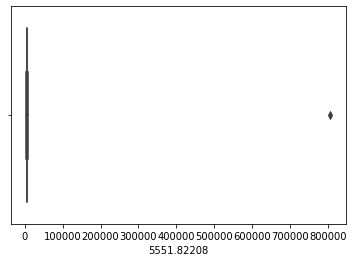

In [5]:
sns.boxplot(data.iloc[:,0])

In [6]:
z = np.abs(stats.zscore(data))
print(z)

[[0.08229398]
 [0.08782374]
 [0.07705526]
 ...
 [0.09743715]
 [0.07254415]
 [0.03178457]]


{'boxes': [<matplotlib.lines.Line2D at 0x7f1dc1dffb10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dc1e07b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dc1e0cbd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dc1e0c690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dc1e07110>,
  <matplotlib.lines.Line2D at 0x7f1dc1e07650>]}

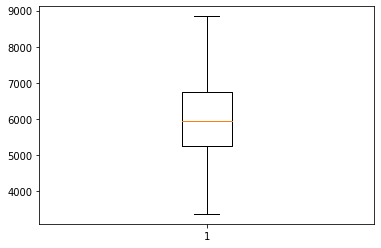

In [7]:
data.iloc[928,0] = data.iloc[927,0]
plt.boxplot(data.iloc[:,0])

In [8]:
x = []
y = []
for i in range(len(data.iloc[:,0])-24):
  x.append(data.iloc[i,0])
  y.append(data.iloc[i+24,0])

In [14]:
x = minmax_scale(x)
y = minmax_scale(y)
data_n= []
for i in range(len(x)):
  data_n.append((x[i],y[i]))
print(len(data_n))
train_data_n,test_data_n = train_test_split(data_n,test_size=0.1)
len(train_data_n)

2159


1943

In [15]:
m = 1
c = 1
learning_rate = 0.01
epochs = 10
momentum_coefficient= 0.9
batch_size = 300
v_m = 0
v_c = 0
def gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))*d[i][0]
  return -1*sum/len(d)
def gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))
  return -1*sum/len(d)
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [16]:
error_list = []
number_of_batches = (len(train_data_n)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = train_data_n[j*batch_size:]
    else:
      d = train_data_n[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient)
    v_m = v_m*momentum_coefficient + delta_m
    v_c = v_c*momentum_coefficient + delta_c
    m = m + v_m
    c = c + v_c
    print(" error {}".format(error(d,m,c)))
    error_list.append(error(d,m,c))
random.shuffle(train_data_n)

 error 0.5005836492576534
 error 0.4732699013780082
 error 0.4583406807867307
 error 0.4043195109871779
 error 0.370551458886974
 error 0.31848251781922493
 error 0.2781574356073435
 error 0.23863000122909825
 error 0.19664095911241297
 error 0.16983950987183966
 error 0.12595674856296135
 error 0.10306145614209755
 error 0.07532959753579398
 error 0.057907553586996105
 error 0.0417632422979887
 error 0.030194649864025366
 error 0.02293529095579667
 error 0.013159463945367366
 error 0.011590140666087217
 error 0.008862248776343706
 error 0.009167363350656483
 error 0.008750952829485532
 error 0.012699075891910416
 error 0.010693753779436902
 error 0.014260830003937472
 error 0.01583903086717437
 error 0.017565552480196943
 error 0.018699284171601938
 error 0.01886163461371973
 error 0.02300015899557465
 error 0.01794086866881621
 error 0.02126316000172116
 error 0.02015805722942878
 error 0.019853250127159987
 error 0.018884076562591324
 error 0.017204113482059323
 error 0.019569501690

Text(0.5, 1.0, 'error graph')

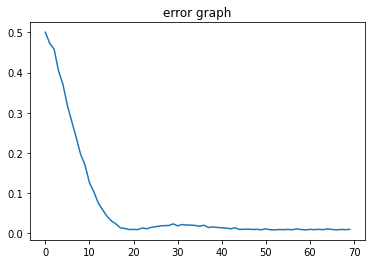

In [17]:
x_1 = range(len(error_list))
y_1 = error_list
plt.plot(x_1,y_1)
plt.title("error graph")

In [18]:
print("train error :",error(train_data_n,m,c))
print("test error :",error(test_data_n,m,c))
print(m,c)

train error : 0.008871665938053816
test error : 0.01011383048657406
0.630160254052654 0.1968210556051388


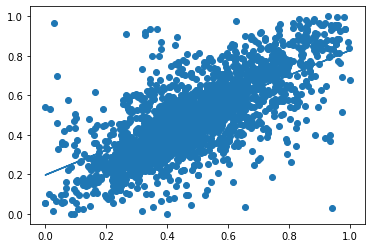

In [19]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [20]:
input_load = float(input("enter yesterday load at this time : "))
maximum_value = 8841.669480
minimum_value = 3377.919600
input_load = (input_load - minimum_value)/(maximum_value-minimum_value)
output_load = input_load*m+c
output_load = output_load*(maximum_value-minimum_value)+minimum_value
print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5555.5
predicted load for this hour is :  5825.5252370281305
